In [1]:
import spock
import random
import numpy as np
import rebound
import pandas as pd
from spock import simsetup
from spock import FeatureClassifier
import matplotlib.pyplot as plt

resTestThetaAlt  tests the min func

resTestTheta normal
res1e4Theta

resThetaData

In [2]:
ResDatapath = '../../cleanData/csvs/resonant/'
RandDatapath = '../../cleanData/csvs/random/'

#data = pd.read_csv(ResDatapath+'07-02-25-thetaSTD.csv')
data = pd.read_csv(ResDatapath+'07-02-25-thetaSTD.csv')

#rand = pd.read_csv(RandDatapath+'rand1e4Theta.csv')

In [3]:
#data = pd.concat([res, rand], axis=0)

In [4]:
data.columns

Index(['Unnamed: 0.1', 'EMcrossnear', 'EMfracstdnear', 'EPstdnear',
       'MMRstrengthnear', 'EMcrossfar', 'EMfracstdfar', 'EPstdfar',
       'MMRstrengthfar', 'threeBRfillfac', 'threeBRfillstd', 'MEGNO',
       'MEGNOstd', 'ThetaSTD12', 'ThetaSTD23', 'ThetaSTD12alt',
       'ThetaSTD23alt', 'Tsec', 'near', 'nearThetaSTD', 'nearThetaSTDalt',
       'InitialStable', 'Unnamed: 0', 'runstring', 'instability_time',
       'shadow_instability_time', 'Stable'],
      dtype='object')

In [5]:
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = np.sqrt(-np.log(1-(x**(-1))))
    return p1+p2
fillList =np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: 10**((x)+5.5), y))


In [6]:
import matplotlib as mpl

In [7]:
data

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,threeBRfillfac,...,Tsec,near,nearThetaSTD,nearThetaSTDalt,InitialStable,Unnamed: 0,runstring,instability_time,shadow_instability_time,Stable
0,0,0.060234,0.029447,0.001995,0.495659,0.504063,0.002900,0.000816,NaN,1.917395,...,28431.355594,"[2, 3]",0.176236,3.008104,True,0,0000000.bin,1.545872e+06,3.063700e+06,False
1,1,0.080547,0.016559,0.000112,0.447418,0.240504,0.006736,0.001621,0.008590,0.407998,...,3904.311701,"[2, 3]",0.506031,2.700674,True,1,0000001.bin,9.990000e+08,9.990000e+08,True
2,2,0.129660,0.028844,0.003181,1.003280,1.001981,0.001402,0.003742,0.010416,0.418203,...,70073.695993,"[1, 2]",1.817621,1.810118,True,2,0000002.bin,9.990000e+08,9.990000e+08,True
3,3,0.406112,0.036478,0.002390,0.321576,0.427768,0.036219,0.008587,0.012953,0.122730,...,18313.684674,"[1, 2]",1.725890,1.881519,True,3,0000003.bin,2.287671e+06,8.392234e+06,False
4,4,0.059897,0.028009,0.001623,0.369199,0.257596,0.053197,0.001287,0.034953,2.369149,...,4110.203941,"[1, 2]",1.786143,1.968942,True,4,0000004.bin,9.668931e+05,3.380350e+05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,102492,0.089252,0.285074,0.013469,0.050147,0.310694,0.037646,0.001068,0.415810,NaN,...,23579.372334,"[2, 3]",1.918205,1.710936,False,102492,9044761.bin,6.303165e+04,6.470086e+04,False
102493,102493,0.082222,0.039388,0.006138,0.651070,0.664222,0.031006,0.001013,NaN,3.802285,...,4127.353879,"[2, 3]",0.140460,3.017713,True,102493,9045377.bin,6.990387e+05,8.267916e+05,False
102494,102494,0.131799,0.022057,0.000146,0.836132,0.366664,0.060791,0.016575,0.005469,0.543637,...,1130.303709,"[1, 2]",1.892131,1.616614,True,102494,9045380.bin,1.193822e+07,3.363291e+07,False
102495,102495,0.209454,0.036889,0.005252,1.469809,0.395073,0.102246,0.022792,0.029169,0.118894,...,4234.297102,"[1, 2]",1.792870,1.846880,True,102495,9045382.bin,2.064407e+08,4.316851e+07,False


In [8]:
# fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
# vmi = 0.5
# vma = 1.75
# tag1 = 'ThetaSTD12'
# tag2 = 'ThetaSTD23'
# ax[0].scatter((data['threeBRfillfac']),(data['instability_time']), 
#            s=2, c=((data[tag1])), cmap="cool",
#            vmin=vmi,vmax=vma,alpha=.8)
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
#              ax=ax, orientation='vertical', label='ThetaSTD')

# # cbar = fig.colorbar(orientation="vertical", extend="both",
# #                     pad=0.05, shrink=1, aspect=20, format="%.3f")

# ax[0].scatter(fillList, y,s=4, c = 'red')
# ax[0].set_xlim([0,20])
# ax[0].set_ylim([1e4,2e9])
# ax[0].set_xlabel(" 3BR fill facture")
# ax[0].set_ylabel("log instability time")
# ax[0].set_yscale('log')
# #cbar.set_label('close body conjunction angle std')
# ax[0].set_facecolor("black")
# ax[0].set_title('std of conjunction angle for inner planet pair')


# ax[1].scatter((data['threeBRfillfac']),(data['instability_time']), 
#            s=2, c=((data[tag2])), cmap="cool",
#            vmin=vmi,vmax=vma,alpha=.8)

# ax[1].scatter(fillList, y,s=4, c = 'red')
# ax[1].set_xlim([0,20])
# ax[1].set_xlabel(" 3BR fill facture")
# ax[1].set_ylabel("log instability time")
# ax[1].set_title('std of conjunction angle for outer planet pair')

# #cbar.set_label('close body conjunction angle std')
# ax[1].set_facecolor("black")

In [9]:
data[['ThetaSTD12','ThetaSTD23','nearThetaSTD']].describe()

,ThetaSTD12,ThetaSTD23,nearThetaSTD
count,102497.000000,102497.000000,102497.000000
mean,1.381532,1.405822,1.405822
std,0.639090,0.623811,0.623811
min,0.004862,0.003875,0.003875
25%,0.887443,0.993977,0.993977
50%,1.733832,1.741690,1.741690
75%,1.826694,1.827202,1.827202
max,2.939410,2.989579,2.989579


In [10]:
data.describe([0.01, 0.2])

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,threeBRfillfac,...,ThetaSTD12,ThetaSTD23,ThetaSTD12alt,ThetaSTD23alt,Tsec,nearThetaSTD,nearThetaSTDalt,Unnamed: 0,instability_time,shadow_instability_time
count,102497.000000,102497.000000,102497.000000,102497.000000,101168.000000,102497.000000,102497.000000,102497.000000,82609.000000,9.595100e+04,...,102497.000000,102497.000000,102497.000000,102497.000000,102497.000000,102497.000000,102497.000000,102497.000000,1.024970e+05,1.024970e+05
mean,51248.000000,0.144542,0.085526,0.005131,0.620823,0.358875,0.037008,0.004885,0.261822,3.408449e+03,...,1.381532,1.405822,2.040272,2.022475,19735.493103,1.405822,2.022475,51248.000000,2.602292e+08,2.679298e+08
std,29588.479608,0.103741,0.115168,0.010026,1.661730,0.200712,0.041414,0.007828,1.158725,1.024100e+06,...,0.639090,0.623811,0.517513,0.508154,22710.122815,0.623811,0.508154,29588.479608,4.221284e+08,4.285158e+08
min,0.000000,0.012845,0.000000,0.000000,0.000266,0.020136,0.000000,0.000000,0.000089,2.353566e-03,...,0.004862,0.003875,0.003731,0.000881,608.030128,0.003875,0.000881,0.000000,1.000287e+04,0.000000e+00
1%,1024.960000,0.024529,0.005134,0.000024,0.008470,0.062689,0.000912,0.000021,0.001094,1.332077e-02,...,0.067543,0.069794,0.684395,0.698968,1386.943991,0.069794,0.698968,1024.960000,1.078143e+04,2.226601e+03
20%,20499.200000,0.063246,0.021595,0.000274,0.049383,0.180049,0.007358,0.000422,0.010685,1.042679e-01,...,0.599706,0.687573,1.740925,1.735508,4456.490102,0.687573,1.735508,20499.200000,5.302827e+04,4.641128e+04
50%,51248.000000,0.117834,0.047823,0.001388,0.144194,0.315298,0.022944,0.001908,0.034530,3.663249e-01,...,1.733832,1.741690,1.838648,1.833341,11471.208706,1.741690,1.833341,51248.000000,1.390492e+06,1.410175e+06
max,102496.000000,0.982453,7.790978,0.188669,65.174991,1.194679,0.600259,0.188758,60.496576,3.170840e+08,...,2.939410,2.989579,3.127383,3.129557,241280.324228,2.989579,3.129557,102496.000000,1.000000e+09,1.000000e+09


In [11]:
data['near'].describe()

count     102497
unique         2
top       [1, 2]
freq       51547
Name: near, dtype: object

In [68]:
temp = data[(data['EMcrossnear'] < 0.024529	)]
temp = temp.drop(78542)
# temp = temp.drop(31819)
# temp = temp.drop(26394)
temp12 = temp[(temp['near'] == '[1, 2]'	)]
temp23 = temp[(temp['near'] == '[2, 3]'	)]


In [98]:
temp['Stable'].sum()

8

In [69]:
temp12[['threeBRfillfac']].describe()

,threeBRfillfac
count,350.000000
mean,3.042402
std,4.758659
min,0.334500
25%,1.259525
50%,1.836937
75%,2.971651
max,59.477000


In [70]:
temp23[['threeBRfillfac']].describe()


,threeBRfillfac
count,395.000000
mean,15.770457
std,15.280720
min,1.215649
25%,6.020626
50%,11.722931
75%,20.156674
max,132.925751


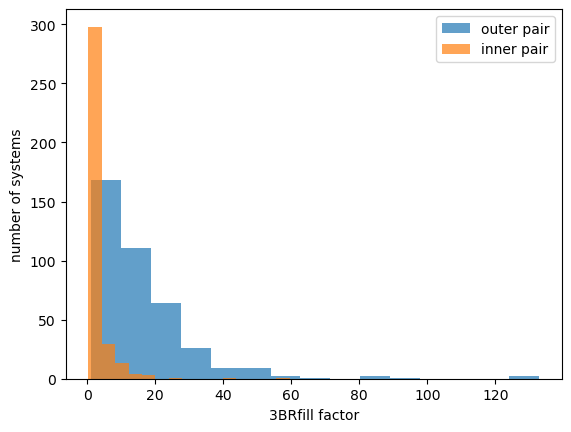

In [92]:
fig, ax = plt.subplots()
ax.hist(temp23['threeBRfillfac'], label='outer pair', alpha=0.7, bins=15)
ax.hist(temp12['threeBRfillfac'], label='inner pair', alpha=0.7, bins=15)

ax.set_ylabel('number of systems')
ax.set_xlabel('3BRfill factor')
ax.legend()

In [81]:
temp23

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,threeBRfillfac,...,Tsec,near,nearThetaSTD,nearThetaSTDalt,InitialStable,Unnamed: 0,runstring,instability_time,shadow_instability_time,Stable
102,102,0.023968,0.098940,0.000185,0.014719,0.495920,0.002750,0.000005,NaN,23.903820,...,12200.719614,"[2, 3]",1.821058,1.876226,True,102,0000102.bin,7.819014e+06,4.295931e+06,False
221,221,0.024261,0.169684,0.000108,0.087318,0.098938,0.039099,0.001253,0.003998,4.938716,...,4886.835217,"[2, 3]",1.553628,1.985555,True,221,0000221.bin,1.232794e+04,1.257652e+04,False
246,246,0.022007,0.209062,0.000863,0.118535,0.031523,0.076463,0.000486,0.071987,24.059802,...,4734.106773,"[2, 3]",1.805266,1.775015,True,246,0000246.bin,2.655102e+04,2.055425e+03,False
309,309,0.020804,0.258137,0.000038,0.069182,0.123763,0.050991,0.001072,0.004863,6.607020,...,7005.432602,"[2, 3]",1.883278,1.684331,True,309,0000309.bin,1.922885e+05,8.587612e+03,False
315,315,0.020208,0.195749,0.000907,0.054182,0.163195,0.013461,0.000583,0.024050,NaN,...,15060.693033,"[2, 3]",2.195478,1.355075,False,315,0000315.bin,1.380181e+05,8.666898e+04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101817,101817,0.020504,0.279791,0.000495,0.060443,0.260954,0.012841,0.000020,0.002725,27.732314,...,8722.805044,"[2, 3]",1.805589,1.824166,True,101817,8731002.bin,3.878987e+04,5.721106e+04,False
101946,101946,0.021519,0.236367,0.000066,0.064257,0.159500,0.023834,0.001304,0.012844,5.147209,...,9414.524539,"[2, 3]",1.832963,1.767488,True,101946,8825377.bin,3.455871e+04,1.997515e+04,False
102183,102183,0.019826,0.220878,0.000375,0.112609,0.086415,0.023359,0.000224,0.022772,NaN,...,10448.694190,"[2, 3]",1.648764,0.700338,False,102183,8928509.bin,2.125545e+04,5.083431e+03,False
102351,102351,0.023716,0.049648,0.000058,0.023257,0.223328,0.006789,0.000070,0.005223,5.995003,...,29379.024767,"[2, 3]",1.842658,1.777307,True,102351,9029142.bin,6.626071e+04,1.026777e+06,False


In [61]:
temp23['threeBRfillfac'].argmax()

154

In [64]:
temp23.iloc[154]

Unnamed: 0.1                      26394
EMcrossnear                    0.012845
EMfracstdnear                  0.055873
EPstdnear                      0.001975
MMRstrengthnear                 1.93305
EMcrossfar                     0.624173
EMfracstdfar                   0.003594
EPstdfar                       0.000022
MMRstrengthfar                 0.095703
threeBRfillfac               130.296362
threeBRfillstd                11.333667
MEGNO                          2.060878
MEGNOstd                       0.029167
ThetaSTD12                     1.786655
ThetaSTD23                     2.233758
ThetaSTD12alt                  1.832958
ThetaSTD23alt                  0.809122
Tsec                        8180.627203
near                             [2, 3]
nearThetaSTD                   2.233758
nearThetaSTDalt                0.809122
InitialStable                      True
Unnamed: 0                        26394
runstring                   4539785.bin
instability_time           19206.087867


In [15]:
temp['near'].describe()

count       1025
unique         2
top       [2, 3]
freq         545
Name: near, dtype: object

In [16]:
temp[['EMcrossnear','threeBRfillfac', 'nearThetaSTD']].describe()

,EMcrossnear,threeBRfillfac,nearThetaSTD
count,1025.000000,7.460000e+02,1025.000000
mean,0.021367,1.267190e+04,1.731569
std,0.002290,3.458403e+05,0.355970
min,0.012845,3.344997e-01,0.051622
25%,0.019825,1.849766e+00,1.709419
50%,0.021782,4.997468e+00,1.800121
75%,0.023289,1.326872e+01,1.887441
max,0.024528,9.445946e+06,2.515658


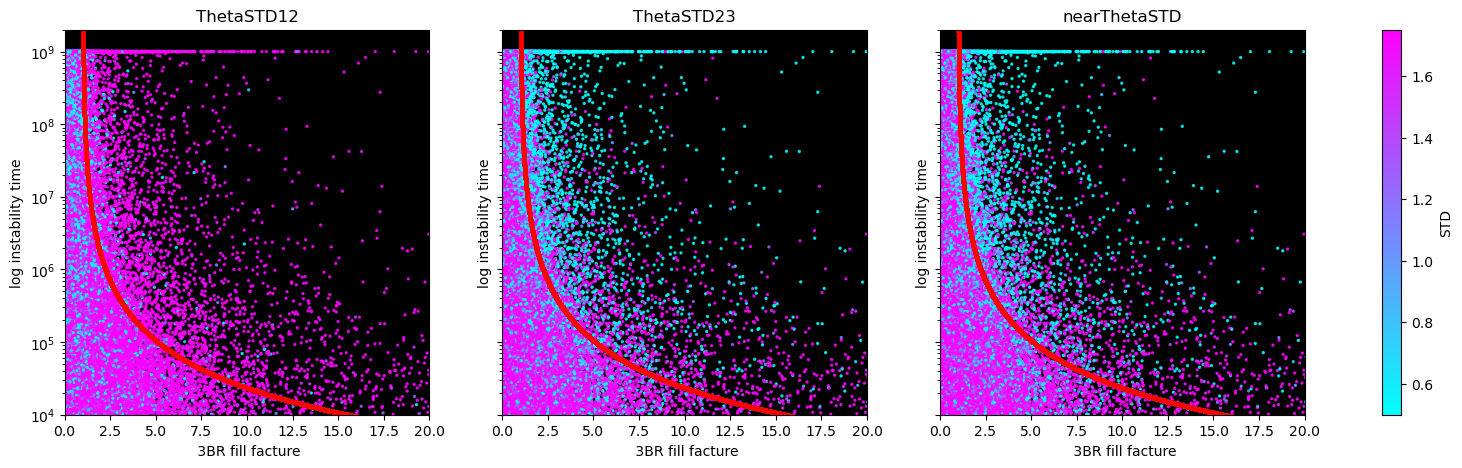

In [45]:
#ax = plt.axes()
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
vmi = 0.5
vma = 1.75

tags =[ 'ThetaSTD12', 'ThetaSTD23','nearThetaSTD']

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='STD')
for i, e in enumerate(tags):
    ax[i].scatter((data['threeBRfillfac']),(data['instability_time']), 
           s=2, c=((data[e])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)
    ax[i].scatter(fillList, y,s=4, c = 'red')
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([1e4,2e9])
    ax[i].set_xlabel(" 3BR fill facture")
    ax[i].set_ylabel("log instability time")
    ax[i].set_yscale('log')
    #cbar.set_label('close body conjunction angle std')
    ax[i].set_facecolor("black")
    ax[i].set_title(e)




In [18]:
specific = data[(data['threeBRfillfac'] > 10) & (data['instability_time']>9e8)]

In [19]:
specific.iloc[1]

Unnamed: 0.1                       7933
EMcrossnear                    0.043934
EMfracstdnear                  0.008022
EPstdnear                      0.000345
MMRstrengthnear                 0.42263
EMcrossfar                     0.869257
EMfracstdfar                   0.001687
EPstdfar                       0.000293
MMRstrengthfar                      NaN
threeBRfillfac                10.228554
threeBRfillstd                 0.274856
MEGNO                          1.999404
MEGNOstd                       0.000386
ThetaSTD12                     1.811246
ThetaSTD23                     0.207008
ThetaSTD12alt                  1.832769
ThetaSTD23alt                  2.950436
Tsec                       12961.211935
near                             [2, 3]
nearThetaSTD                   0.207008
nearThetaSTDalt                2.950436
InitialStable                      True
Unnamed: 0                         7933
runstring                   0007960.bin
instability_time           1000000000.0


In [20]:
sim = rebound.Simulation(ResDatapath+"clean_initial_conditions.bin", snapshot=7933)

In [21]:
def threeBRFillFac(sim, trio):
    '''calculates the 3BR filling factor in acordance to petit20'''
    ps = sim.particles
    b0, b1,b2,b3 = ps[0], ps[trio[0]], ps[trio[1]], ps[trio[2]]
    m0,m1,m2,m3 = b0.m,b1.m,b2.m,b3.m
    ptot = None

    #semim
    a12 =(b1.a/b2.a)
    a23 = (b2.a/b3.a)

    #equation 43
    d12 = 1- a12
    d23 = 1- a23

    #equation 45
    d = (d12*d23)/(d12+d23)

    #equation 19
    mu12 = b1.P/b2.P
    mu23 = b2.P/b3.P

    #equation 21
    eta = (mu12*(1-mu23))/(1-(mu12*mu23))

    #equation 53
    eMpow2 = (m1*m3 + m2*m3*(eta**2)*(a12**(-2))+m1*m2*(a23**2)*((1-eta)**2))/(m0**2)

    #equation 59
    dov = ((42.9025)*(eMpow2)*(eta*((1-eta)**3)))**(0.125)


    #equation 60

    ptot = (dov/d)**4

    return abs(ptot)

In [22]:
import spock.simsetup


spock.simsetup.init_sim_parameters(sim)

In [30]:
sim.integrate(12961.211935)

In [31]:
threeBRFillFac(sim,[1,2,3])

9.956404232959862

In [24]:
from spock import features

In [29]:
features.threeBRFillFac(sim,[1,2,3])

10.194035623972265

/home/ethadhani/summerSPOCK/datafilt/graphThetaSTD.ipynb

maybe try mod pi and see if that fixed the issue

In [27]:
specific = data[(data['threeBRfillfac'] > 15) & (data['instability_time']>9e8)]

In [12]:
specific['Unnamed: 0.1']

27216    27216
37919    37919
43946    43946
54691    54691
64067    64067
65167    65167
96975    96975
Name: Unnamed: 0.1, dtype: int64


In [ ]:
27216
37919
43946
54691
64067
65167
96975

In [28]:
ps = sim.particles

Nu12 = ps[1].P/ps[2].P
Nu23 = ps[2].P/ps[3].P
masses = [ps[1].m,ps[2].m,ps[3].m]

Eta = Nu12*(1-Nu23)/(1-Nu12*Nu23)
Nu = 1/(1/(1/Nu12-1)+1/(1-Nu23))

In [29]:
def nu_eta_to_nus(nu,eta):
    return eta/(eta+nu),(1-eta-nu)/(1-eta)

In [30]:
def _fillingfactor_th(nu,eta,masses,m0=1.):
    "Auxiliary function to compute theoretical overlap limit"
    m1,m2,m3 = masses
    nu12,nu23 = nu_eta_to_nus(nu,eta)
    plsep = 1/(1/(1-nu12**(2/3))+1/(1-nu23**(2/3)))
    Mfac = (m1*m3/m0**2*(eta**2/nu12**(4/3)+1+(1-eta)**2*nu23**(4/3)))**.5

    return np.nan_to_num(Mfac*(38/np.pi)**.5*4*2**.5/3*(eta*(1-eta))**1.5/plsep**4-1)

In [32]:
from scipy.optimize import fsolve

In [33]:
def nu_overlaplimit(etas,masses,m0=1.):
    nuguess = 0.05*np.ones_like(etas)
    nuov = fsolve(_fillingfactor_th,nuguess,args=(etas,masses,m0))
    return nuov

In [ ]:
nu_overlaplimit(etas,masses,m0=1.)

In [31]:
_fillingfactor_th(Nu, Eta, masses)

0.3729319482290152